# Measuring Fidelity

In [1]:
from qutip import basis, tensor, sigmax, sigmay, sigmaz, qeye, ket2dm, Qobj, ptrace
import qutip
from qutip.qip.operations import rx, ry, rz
import numpy as np
from numpy import sqrt, exp, cos, sin
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
π = np.pi

## Operations

In [3]:
X = lambda N,i : tensor([sigmax() if j==i else qeye(2) for j in range(N)])

In [4]:
XX = lambda N, i, j, ϕ : (1j*ϕ*X(N,i)*X(N,j)).expm()

In [5]:
proj = lambda N, i, a, b : tensor([basis(2,a)*basis(2,b).dag() if j==i else qeye(2) for j in range(N)])

In [6]:
def measure_computational(ρ):
    mat = ρ.full()
    return abs(mat.diagonal())

In [7]:
def measurement_parity(bitstr_probs):
    number_parity = lambda n : -2*((f"{n:b}".count('1') % 2)-1/2) # even=1, odd=-1
    return sum([p*number_parity(n) for n,p in enumerate(bitstr_probs)])

In [8]:
def R(θ,ϕ):
    return Qobj([[cos(θ/2), -1j*exp(-1j*ϕ)*sin(θ/2)],[-1j*exp(1j*ϕ)*sin(θ/2), cos(θ/2)]])

In [9]:
def measureEntanglementFidelityFromParityScan_2ion(ρ):
    ϕ_vals = np.linspace(0, π, 100)
    P_vals = []
    for ϕ in ϕ_vals:
        ρ_rotated = tensor(R(π/2,ϕ),R(π/2,ϕ))*ρ*tensor(R(π/2,ϕ),R(π/2,ϕ)).dag()
        P = measurement_parity(measure_computational(ρ_rotated))
        P_vals.append(P)
    AΠ = (np.max(P_vals)-np.min(P_vals))/2
    measurement_probs = measure_computational(ρ)
    even_parity_pop = measurement_probs[0] + measurement_probs[3]
    F = (even_parity_pop + AΠ)/2
    # print(measurement_probs)
    # print(even_parity_pop)
    # print(AΠ)
    return F

# 2-qubit Ideal XX Fidelity Check

In [10]:
ψ_bell = 1/sqrt(2)*(tensor(basis(2,0),basis(2,0))+1j*tensor(basis(2,1),basis(2,1)))
ρ_bell = ket2dm(ψ_bell)

In [11]:
measureEntanglementFidelityFromParityScan_2ion(ρ_bell)

0.9999370638369374

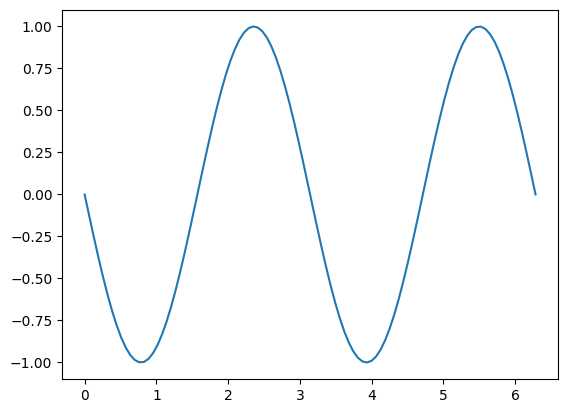

In [12]:
ρ = ρ_bell
#ρ = ket2dm(tensor(basis(2,0),basis(2,0)))
ϕ_vals = np.linspace(0, 2*π, 100)
P_vals = []
for ϕ in ϕ_vals:
    ρ_rotated = tensor(R(π/2,ϕ),R(π/2,ϕ))*ρ*tensor(R(π/2,ϕ),R(π/2,ϕ)).dag()
    P = measurement_parity(measure_computational(ρ_rotated))
    P_vals.append(P)
plt.plot(ϕ_vals, P_vals)